# Variations in Earth's 3d spectrum as a function of *phase angle*

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as image

import itertools as it
from astropy import units as u

In [3]:
image_path= '/Users/apayne3/Desktop/GlobES/PSG_FILES/phase_images/'
spectra_path= '/Users/apayne3/Desktop/GlobES/PSG_FILES/phase_spectra/'

In [4]:
p0= np.genfromtxt('./true_psg_files/psg_rad_3d_e0.txt')
p30=np.genfromtxt(spectra_path+'psg_phase30.txt')
p60=np.genfromtxt(spectra_path+'psg_phase60.txt')
p90=np.genfromtxt(spectra_path+'psg_phase90.txt')
p120=np.genfromtxt(spectra_path+'psg_phase120.txt')
p150=np.genfromtxt(spectra_path+'psg_phase150.txt')
p180=np.genfromtxt(spectra_path+'psg_phase180.txt')

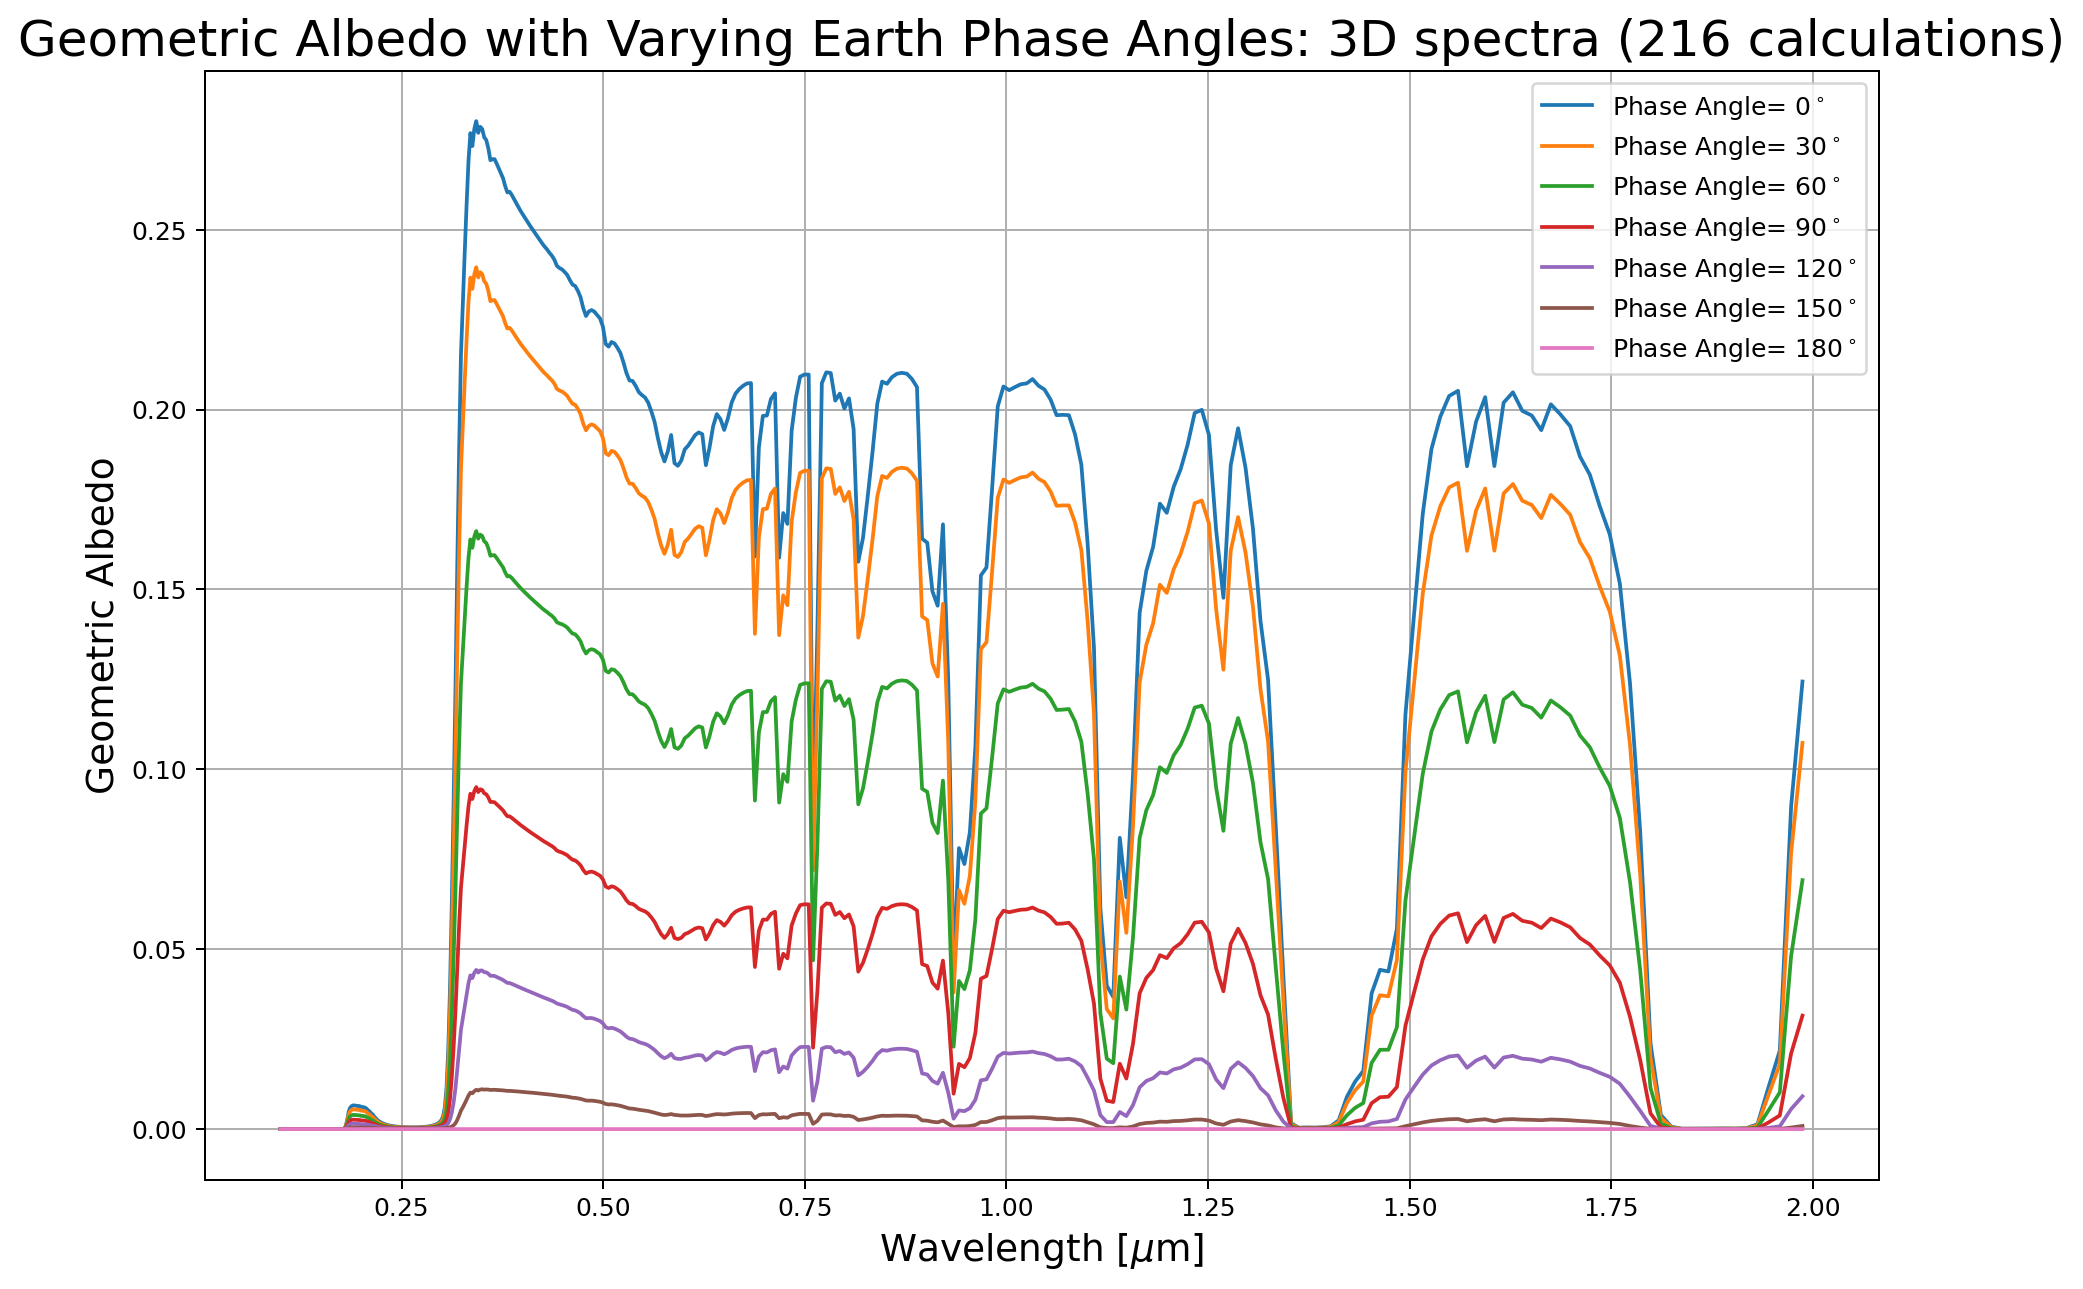

In [4]:
fig= plt.figure(figsize=(12,8), dpi=180)
plt.plot(p0[:,0],p0[:,1], label='Phase Angle= 0$^\circ$')
plt.plot(p30[:,0],p30[:,1], label='Phase Angle= 30$^\circ$')
plt.plot(p60[:,0],p60[:,1], label='Phase Angle= 60$^\circ$')
plt.plot(p90[:,0],p90[:,1], label='Phase Angle= 90$^\circ$')
plt.plot(p120[:,0],p120[:,1], label='Phase Angle= 120$^\circ$')
plt.plot(p150[:,0],p150[:,1], label='Phase Angle= 150$^\circ$')
plt.plot(p180[:,0],p180[:,1], label='Phase Angle= 180$^\circ$')
plt.ylabel('Geometric Albedo', size= 15)
plt.xlabel('Wavelength [$\mu$m]', size=15)
plt.legend()
plt.grid()
plt.title('Geometric Albedo with Varying Earth Phase Angles: 3D spectra (216 calculations)', size=20)
#plt.savefig('phase_angle_spectra_3d.png');

## compare index 173; where max value occurs (at least in p0)

In [43]:
len(p0[:,1])

421

In [5]:
index=387
p0[:,0][index], p0[:,1][index]

(1.571255425, 0.18425505)

In [6]:
data= [p0,p30,p60,p90,p120,p150,p180]

In [7]:
y_vals=[]
for value in data:
    plot= value[:,1][173]
    y_vals.append(plot)

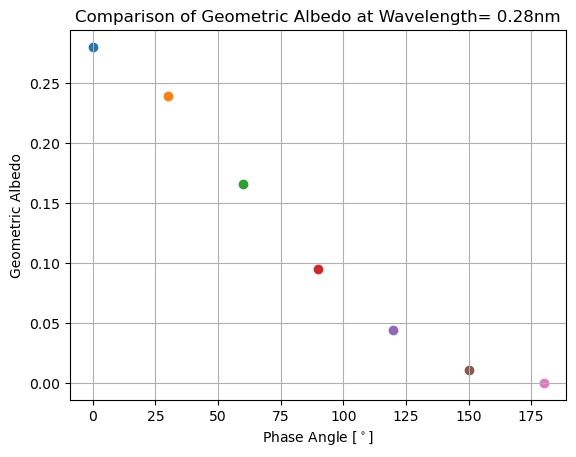

In [8]:
for i, x in it.zip_longest(y_vals, np.linspace(0,180,7)):
    plt.scatter(x,i)
plt.xlabel('Phase Angle [$^\circ$]')
plt.ylabel('Geometric Albedo')
plt.grid()
plt.title('Comparison of Geometric Albedo at Wavelength= 0.28nm');

## compare values at approximately wavelength =1.6 nm

In [9]:
# using this to compare the magnitude values to the plot above and try to find the point that matches the spectral dips around wavelength= 1.6 nm
index=387
p0[:,0][index], p0[:,1][index]

(1.571255425, 0.18425505)

In [10]:
y_vals_2=[]
for value in data:
    plot= value[:,1][387]
    y_vals_2.append(plot)

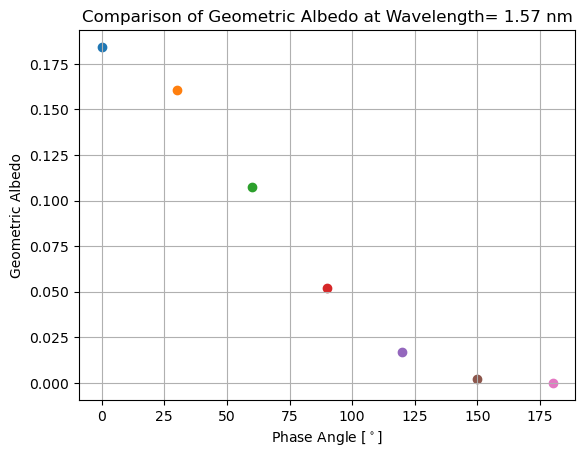

In [11]:
for i, x in it.zip_longest(y_vals_2, np.linspace(0,180,7)):
    plt.scatter(x,i)
plt.xlabel('Phase Angle [$^\circ$]')
plt.ylabel('Geometric Albedo')
plt.grid()
plt.title('Comparison of Geometric Albedo at Wavelength= 1.57 nm');

# Define the function for the Lambert Phase Integral:

In [12]:
def lamb_phase_int(phase_angle):
    result= (1/np.pi)*(np.sin(phase_angle*u.deg.to(u.rad))+(np.pi-phase_angle*u.deg.to(u.rad))*np.cos(phase_angle*u.deg.to(u.rad)))
    return result

In [13]:
x_vals= np.linspace(0,180,1000)
lamb_phase_int(x_vals)

array([1.00000000e+00, 9.99995059e-01, 9.99980248e-01, 9.99955587e-01,
       9.99921097e-01, 9.99876798e-01, 9.99822709e-01, 9.99758852e-01,
       9.99685246e-01, 9.99601912e-01, 9.99508872e-01, 9.99406144e-01,
       9.99293751e-01, 9.99171713e-01, 9.99040051e-01, 9.98898786e-01,
       9.98747940e-01, 9.98587533e-01, 9.98417587e-01, 9.98238124e-01,
       9.98049165e-01, 9.97850731e-01, 9.97642845e-01, 9.97425528e-01,
       9.97198802e-01, 9.96962689e-01, 9.96717211e-01, 9.96462391e-01,
       9.96198250e-01, 9.95924811e-01, 9.95642096e-01, 9.95350128e-01,
       9.95048929e-01, 9.94738523e-01, 9.94418931e-01, 9.94090177e-01,
       9.93752284e-01, 9.93405274e-01, 9.93049171e-01, 9.92683998e-01,
       9.92309778e-01, 9.91926535e-01, 9.91534292e-01, 9.91133072e-01,
       9.90722899e-01, 9.90303797e-01, 9.89875790e-01, 9.89438900e-01,
       9.88993153e-01, 9.88538572e-01, 9.88075182e-01, 9.87603006e-01,
       9.87122068e-01, 9.86632394e-01, 9.86134007e-01, 9.85626931e-01,
      

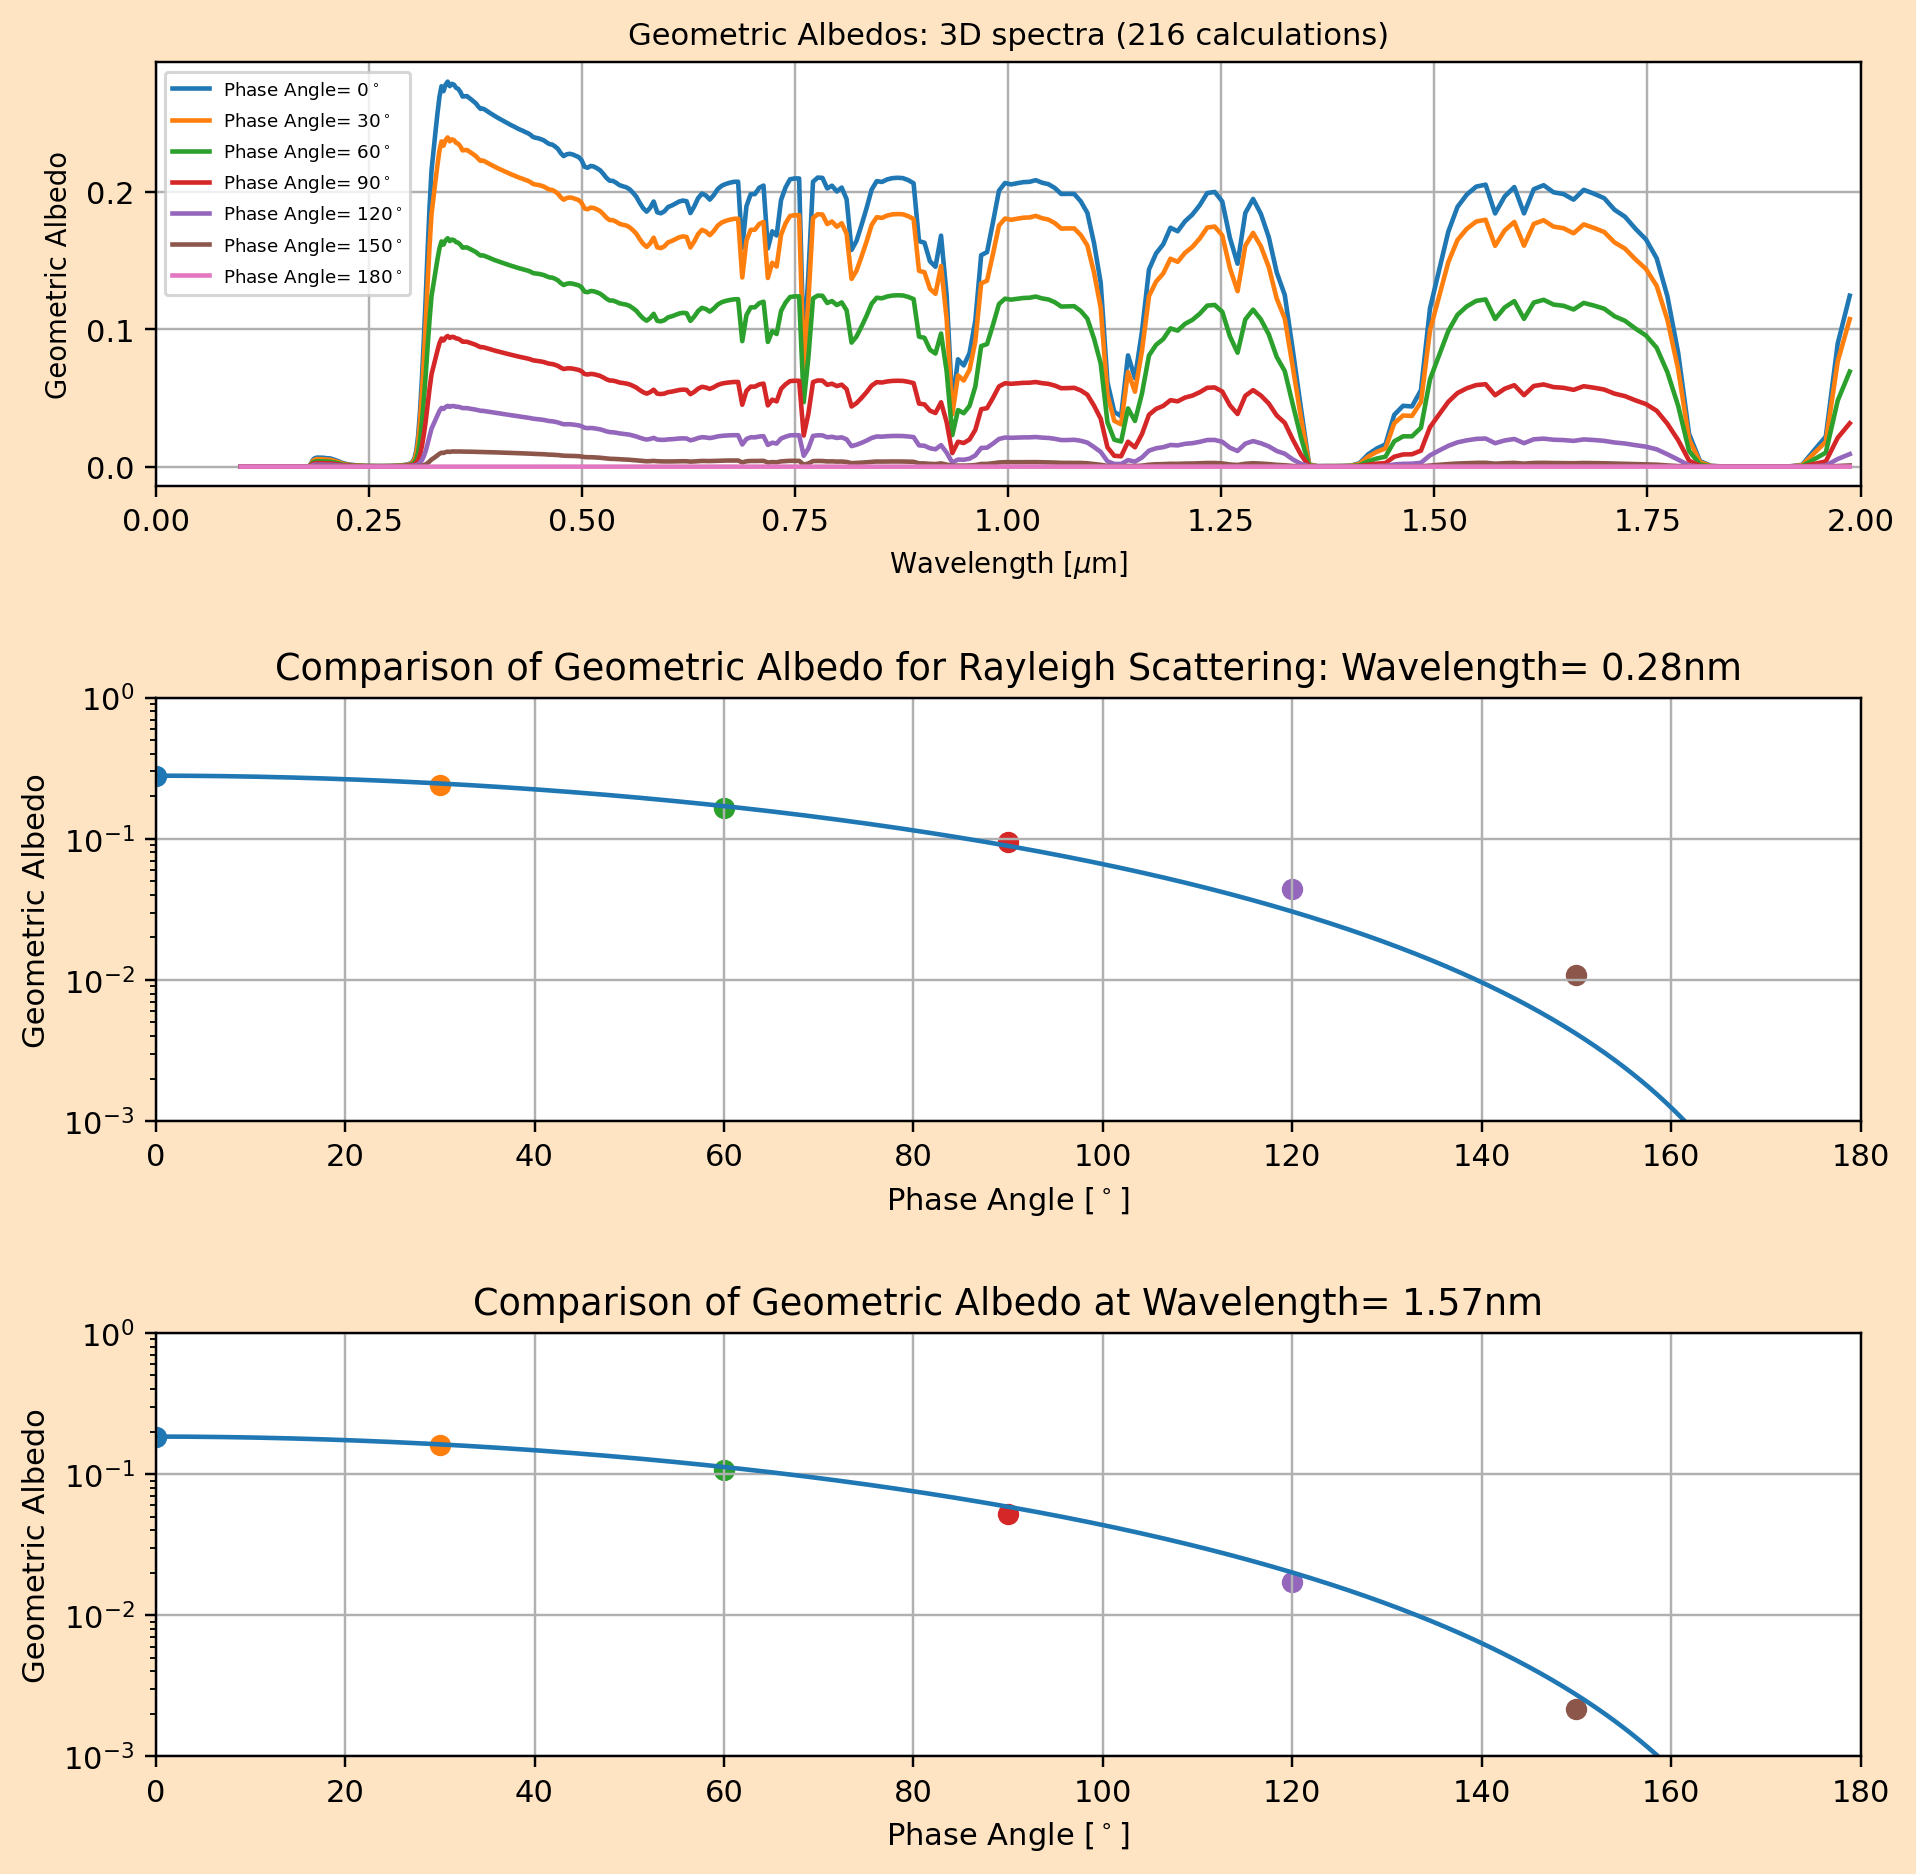

In [18]:
fig, ax = plt.subplots(3, 1, sharex=False, sharey=False, figsize=(10,10), dpi=220, facecolor='bisque', alpha=0.5)
plt.subplots_adjust(hspace=0.5)
ax[0].plot(p0[:,0],p0[:,1], label='Phase Angle= 0$^\circ$')
ax[0].plot(p30[:,0],p30[:,1], label='Phase Angle= 30$^\circ$')
ax[0].plot(p60[:,0],p60[:,1], label='Phase Angle= 60$^\circ$')
ax[0].plot(p90[:,0],p90[:,1], label='Phase Angle= 90$^\circ$')
ax[0].plot(p120[:,0],p120[:,1], label='Phase Angle= 120$^\circ$')
ax[0].plot(p150[:,0],p150[:,1], label='Phase Angle= 150$^\circ$')
ax[0].plot(p180[:,0],p180[:,1], label='Phase Angle= 180$^\circ$')
ax[0].set_ylabel('Geometric Albedo', size= 9)
ax[0].set_xlabel('Wavelength [$\mu$m]', size=9)
ax[0].legend(fontsize='6')
ax[0].grid()
ax[0].set_xlim(xmin=0, xmax=2)
ax[0].set_title('Geometric Albedos: 3D spectra (216 calculations)', size=10)

for i, x in it.zip_longest(y_vals, np.linspace(0,180,7)):
    ax[1].scatter(x,i)
ax[1].set_xlabel('Phase Angle [$^\circ$]')
ax[1].set_ylabel('Geometric Albedo')
ax[1].set_xlim(xmin=0, xmax=180)
ax[1].set_yscale('log')
ax[1].set_ylim([1e-3,1.0])
ax[1].grid()
ax[1].set_title('Comparison of Geometric Albedo for Rayleigh Scattering: Wavelength= 0.28nm');
# plt.savefig('phases_and_cosine_version1.png')
# Fitting Lambert Phase Integral in plot:
x_vals= np.linspace(0,180,1000)
ax[1].plot(x_vals, lamb_phase_int(x_vals)*0.28) # multiple each function by the y intercept for a proper fit
# the phi value is a scaling factor! this should be multiplied by the value @ phase=0 for a proper fit

for i, x in it.zip_longest(y_vals_2, np.linspace(0,180,7)):
    ax[2].scatter(x,i)
ax[2].set_xlabel('Phase Angle [$^\circ$]')
ax[2].set_ylabel('Geometric Albedo')
ax[2].set_xlim(xmin=0, xmax=180)
ax[2].set_yscale('log')
ax[2].set_ylim([1e-3,1.0])
ax[2].grid()
ax[2].plot(x_vals, lamb_phase_int(x_vals)*0.18425505)
ax[2].set_title('Comparison of Geometric Albedo at Wavelength= 1.57nm')
plt.savefig('phase_variation_log.png');

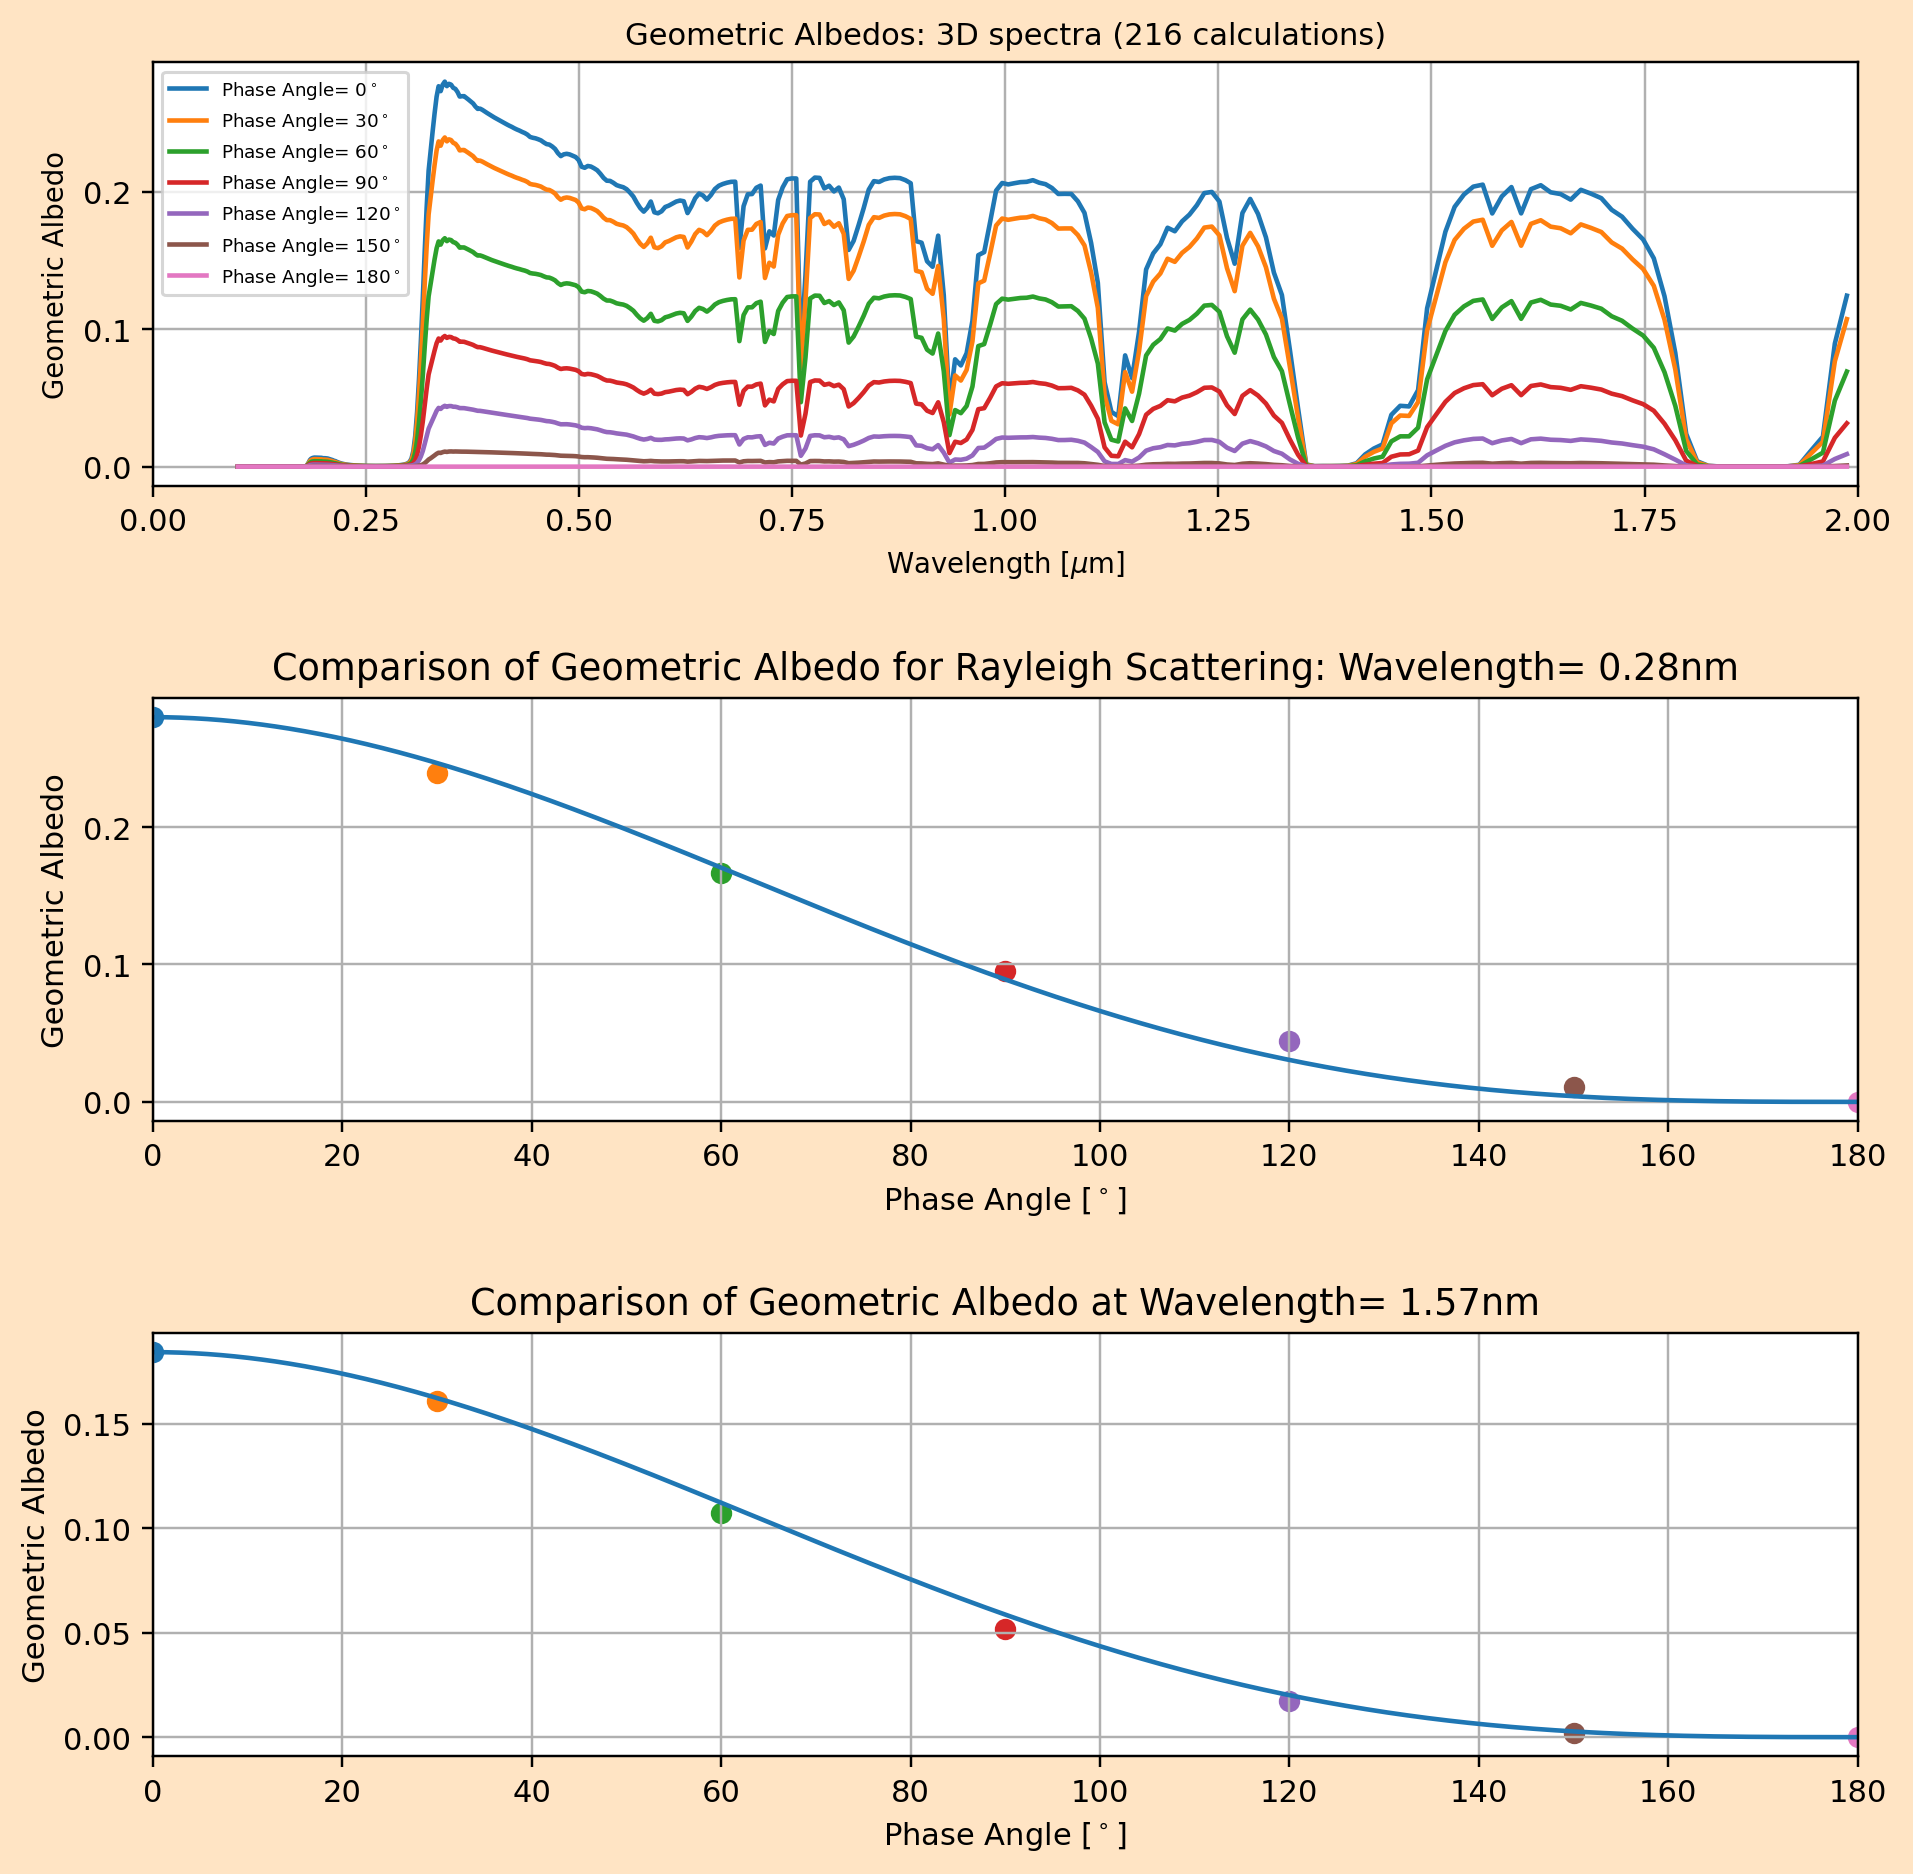

In [17]:
fig, ax = plt.subplots(3, 1, sharex=False, sharey=False, figsize=(10,10), dpi=220, facecolor='bisque', alpha=0.5)
plt.subplots_adjust(hspace=0.5)
ax[0].plot(p0[:,0],p0[:,1], label='Phase Angle= 0$^\circ$')
ax[0].plot(p30[:,0],p30[:,1], label='Phase Angle= 30$^\circ$')
ax[0].plot(p60[:,0],p60[:,1], label='Phase Angle= 60$^\circ$')
ax[0].plot(p90[:,0],p90[:,1], label='Phase Angle= 90$^\circ$')
ax[0].plot(p120[:,0],p120[:,1], label='Phase Angle= 120$^\circ$')
ax[0].plot(p150[:,0],p150[:,1], label='Phase Angle= 150$^\circ$')
ax[0].plot(p180[:,0],p180[:,1], label='Phase Angle= 180$^\circ$')
ax[0].set_ylabel('Geometric Albedo', size= 9)
ax[0].set_xlabel('Wavelength [$\mu$m]', size=9)
ax[0].legend(fontsize='6')
ax[0].grid()
ax[0].set_xlim(xmin=0, xmax=2)
ax[0].set_title('Geometric Albedos: 3D spectra (216 calculations)', size=10)

for i, x in it.zip_longest(y_vals, np.linspace(0,180,7)):
    ax[1].scatter(x,i)
ax[1].set_xlabel('Phase Angle [$^\circ$]')
ax[1].set_ylabel('Geometric Albedo')
ax[1].set_xlim(xmin=0, xmax=180)
ax[1].grid()
ax[1].set_title('Comparison of Geometric Albedo for Rayleigh Scattering: Wavelength= 0.28nm');
# plt.savefig('phases_and_cosine_version1.png')
# Fitting Lambert Phase Integral in plot:
x_vals= np.linspace(0,180,1000)
ax[1].plot(x_vals, lamb_phase_int(x_vals)*0.28) # multiple each function by the y intercept for a proper fit
# the phi value is a scaling factor! this should be multiplied by the value @ phase=0 for a proper fit

for i, x in it.zip_longest(y_vals_2, np.linspace(0,180,7)):
    ax[2].scatter(x,i)
ax[2].set_xlabel('Phase Angle [$^\circ$]')
ax[2].set_ylabel('Geometric Albedo')
ax[2].set_xlim(xmin=0, xmax=180)
ax[2].grid()
ax[2].plot(x_vals, lamb_phase_int(x_vals)*0.18425505)
ax[2].set_title('Comparison of Geometric Albedo at Wavelength= 1.57nm')
plt.savefig('phase_variation_normal.png');

# 1D Plots

In [82]:
x_vals= np.linspace(0,180,1000)
print(x_vals)

[  0.           0.18018018   0.36036036   0.54054054   0.72072072
   0.9009009    1.08108108   1.26126126   1.44144144   1.62162162
   1.8018018    1.98198198   2.16216216   2.34234234   2.52252252
   2.7027027    2.88288288   3.06306306   3.24324324   3.42342342
   3.6036036    3.78378378   3.96396396   4.14414414   4.32432432
   4.5045045    4.68468468   4.86486486   5.04504505   5.22522523
   5.40540541   5.58558559   5.76576577   5.94594595   6.12612613
   6.30630631   6.48648649   6.66666667   6.84684685   7.02702703
   7.20720721   7.38738739   7.56756757   7.74774775   7.92792793
   8.10810811   8.28828829   8.46846847   8.64864865   8.82882883
   9.00900901   9.18918919   9.36936937   9.54954955   9.72972973
   9.90990991  10.09009009  10.27027027  10.45045045  10.63063063
  10.81081081  10.99099099  11.17117117  11.35135135  11.53153153
  11.71171171  11.89189189  12.07207207  12.25225225  12.43243243
  12.61261261  12.79279279  12.97297297  13.15315315  13.33333333
  13.51351

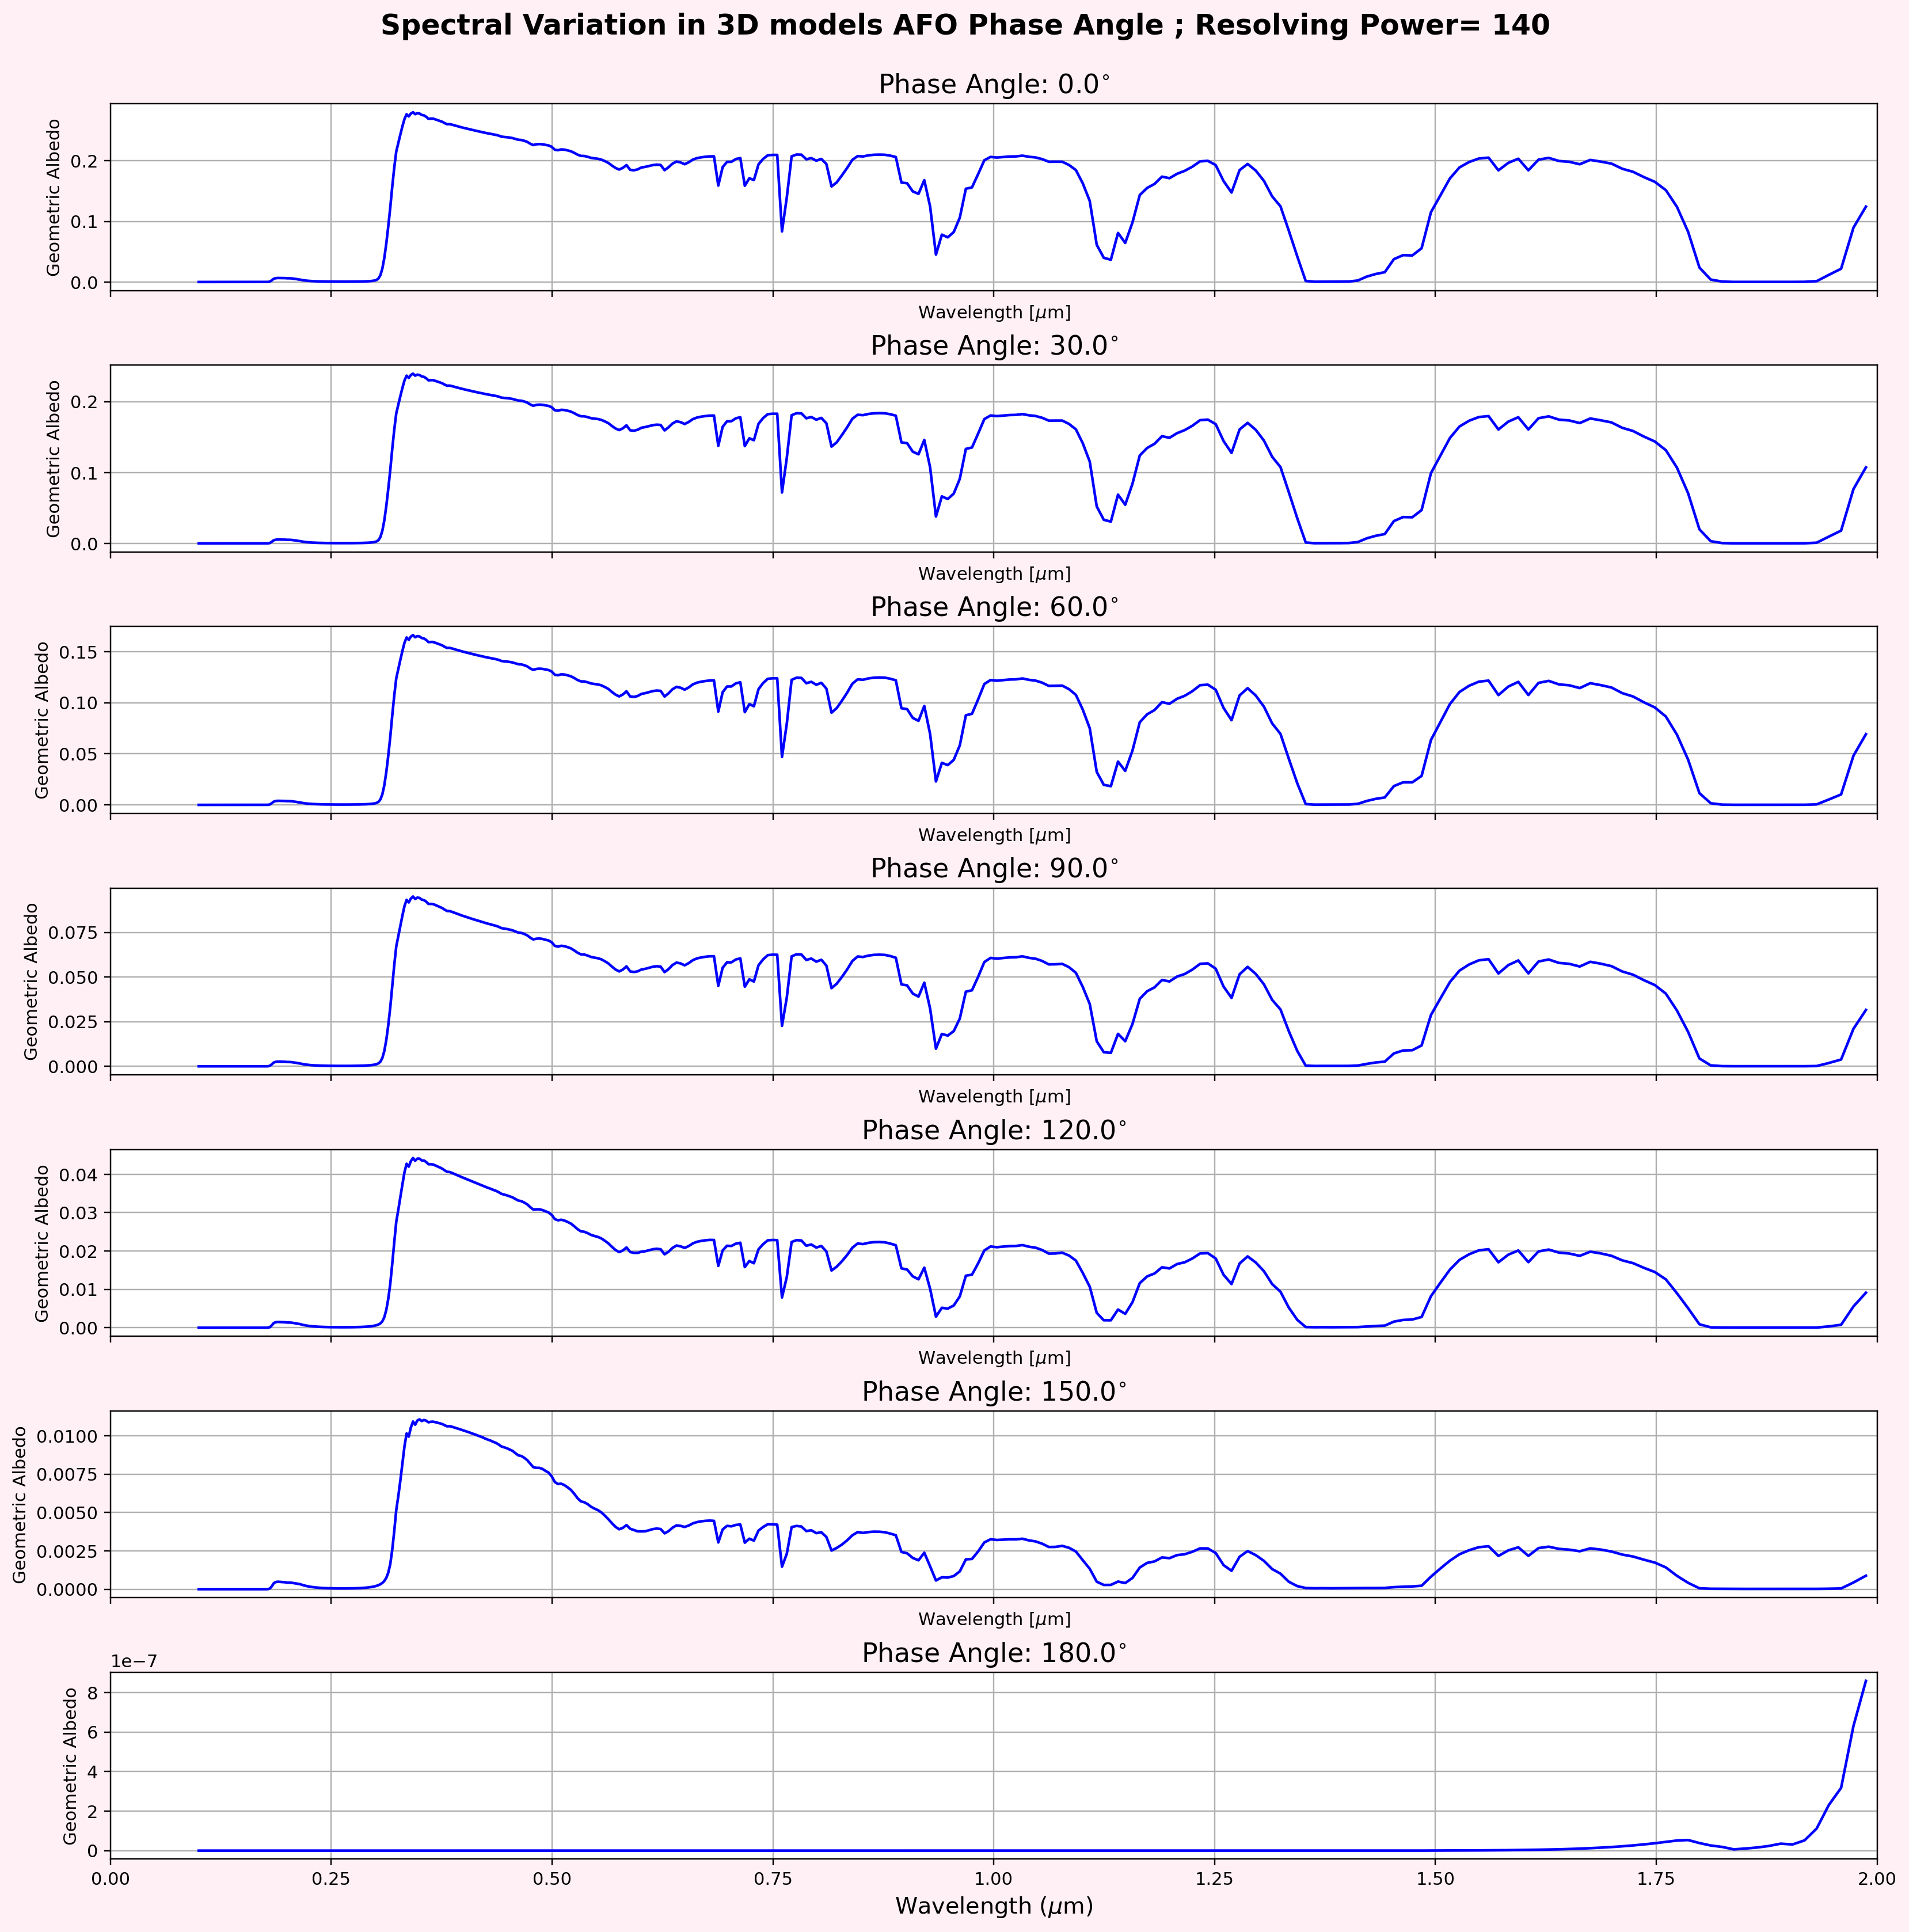

In [245]:
#fig, (ax[1,1],ax[1,2], ax[2,1],ax[2,2]) =plt.subplots(6, 2, figsize=(12,18), dpi=180)
fig, ax = plt.subplots(7, 1, sharex='col', sharey='row', figsize=(18,18), dpi=220, facecolor='lavenderblush', alpha=0.5)


# for i, x in it.zip_longest(file_list[0:3], range(4)):
#     data= np.genfromtxt(spectra_path+i)
#     ax[x].plot(data[0:], data[1:],label='Absorbing (All)', color='blue', linewidth= 2)

#     for file in sorted(os.listdir(spectra_path)) & for value in range(7):
#     if "phase" in file:
#         print(file)
#         data= np.genfromtxt(spectra_path+file)
#         ax[1].plot(data[:,0], data[:,1],label='Absorbing (All)', color='blue', linewidth= 2)

list_test= (np.arange(0,7,1), np.linspace(0,180,7))
pd_test= pd.DataFrame(list_test).transpose()

# for value in range(7):
# # use spectral data here:
#     for file in sorted(os.listdir(spectra_path)):
#         if ".DS" in file: continue
#         data= np.genfromtxt(file)
#         ax[value].plot(data[:,0], data[:,1],label='Absorbing (All)', color='blue', linewidth= 2)
    
'''
for e_val in np.arange(0,6,1):
    #Second Row: E-1= 0.1 PAL
    ax[e_val,0].plot(test_dic['E-'+str(e_val)+'_atm_all_out_spec'][:,0], test_dic['E-'+str(e_val)+'_atm_all_out_spec'][:,1],label='Absorbing (All)', color='blue', linewidth= 2)
    ax[e_val,0].set_facecolor('oldlace')
    ax[e_val,1].set_facecolor('oldlace')
    #ax[e_val,0].set_facecolor('lightgray')
    ax[e_val,1].plot(test_dic['E-'+str(e_val)+'_atm_all_out_spec'][:,0], test_dic['E-'+str(e_val)+'_atm_all_out_spec'][:,1],label='Absorbing (All)', color='blue', linewidth= 2)
    ax[e_val,1].plot(test_dic['E-'+str(e_val)+'_atm_no_o2_out_spec'][:,0], test_dic['E-'+str(e_val)+'_atm_no_o2_out_spec'][:,1],label='Continuum (All but $O_{2}$)', color='hotpink')
    ax[e_val,0].plot(test_dic['E-'+str(e_val)+'_atm_no_o3_out_spec'][:,0], test_dic['E-'+str(e_val)+'_atm_no_o3_out_spec'][:,1],label='Continuum (All but $O_{3}$)', color='hotpink')

'''

ax[0].plot(p0[:,0],p0[:,1], color='blue')
ax[1].plot(p30[:,0], p30[:,1], color='blue')
ax[2].plot(p60[:,0], p60[:,1], color='blue')
ax[3].plot(p90[:,0], p90[:,1], color='blue')
ax[4].plot(p120[:,0], p120[:,1], color='blue')
ax[5].plot(p150[:,0], p150[:,1], color='blue')
ax[6].plot(p180[:,0], p180[:,1], color='blue')

# Try to vary the angles as titles here...
for value in range(7):
    ax[value].set_title('Phase Angle: '+str(pd_test[1][value])+ '$^{\circ}$', size=15)
    ax[value].set_ylabel('Geometric Albedo')
    ax[value].set_xlabel('Wavelength [$\mu$m]')
    # Set the limits on the x axis
    ax[value].set_xlim(xmin=0, xmax=2)
    ax[value].set_xlim(xmin=0, xmax=2)
    # Add legend to each plot
    #ax[value].legend()
    ax[value].grid()
plt.xlabel(r'Wavelength ($\mu$m)', size=13)
plt.subplots_adjust(hspace=0.4)
plt.suptitle('Spectral Variation in 3D models AFO Phase Angle ; Resolving Power= 140', y=0.92, size=16, weight='bold');
plt.savefig('../finished_work/spectral_variations_plot_phase_list.png')

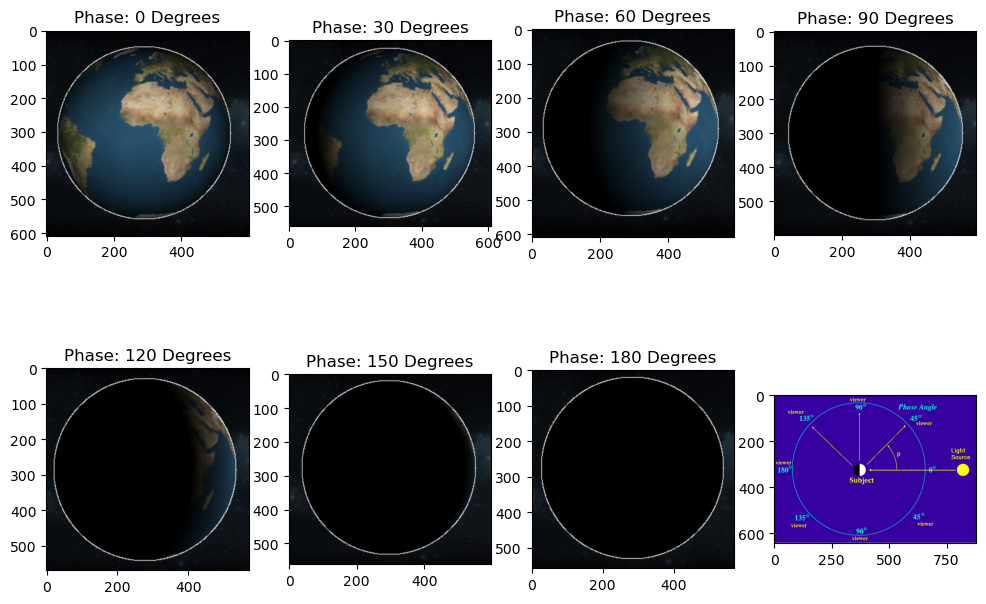

In [102]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,4,1)

image_1= plt.imread(image_path+'phase_0.png')
ax1.imshow(image_1)
ax1.set_title('Phase: 0 Degrees')

ax2 = fig.add_subplot(2,4,2)
image_2= plt.imread(image_path+'phase_30.png')
ax2.set_title('Phase: 30 Degrees')
ax2.imshow(image_2)

ax3 = fig.add_subplot(2,4,3)
image_3= plt.imread(image_path+'phase_60.png')
ax3.set_title('Phase: 60 Degrees')
ax3.imshow(image_3)

ax4 = fig.add_subplot(2,4,4)
image_4= plt.imread(image_path+'phase_90.png')
ax4.set_title('Phase: 90 Degrees')
ax4.imshow(image_4)

ax5 = fig.add_subplot(2,4,5)
image_5= plt.imread(image_path+'phase_120.png')
ax5.set_title('Phase: 120 Degrees')
ax5.imshow(image_5)

ax6 = fig.add_subplot(2,4,6)
image_6= plt.imread(image_path+'phase_150.png')
ax6.set_title('Phase: 150 Degrees')
ax6.imshow(image_6)

ax7 = fig.add_subplot(2,4,7)
image_7= plt.imread(image_path+'phase_180.png')
ax7.set_title('Phase: 180 Degrees')
ax7.imshow(image_7)

ax8 = fig.add_subplot(2,4,8)
image_8= plt.imread('phase_angle_diagram.gif')
#ax8.set_title('')
ax8.imshow(image_8)

plt.savefig('PhaseAngles.png')

